#  Capstone Project  churn rate predictor 

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\entro\py\DATA\Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## A Quick Data Check

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


# Exploratory Data Analysis


In [6]:

df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

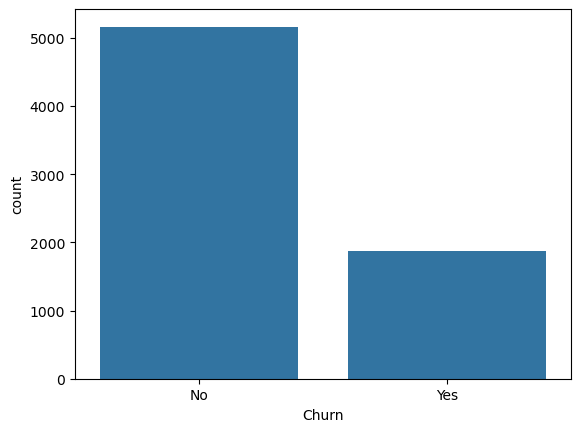

In [7]:

sns.countplot(data=df, x='Churn')

<Axes: xlabel='Churn', ylabel='TotalCharges'>

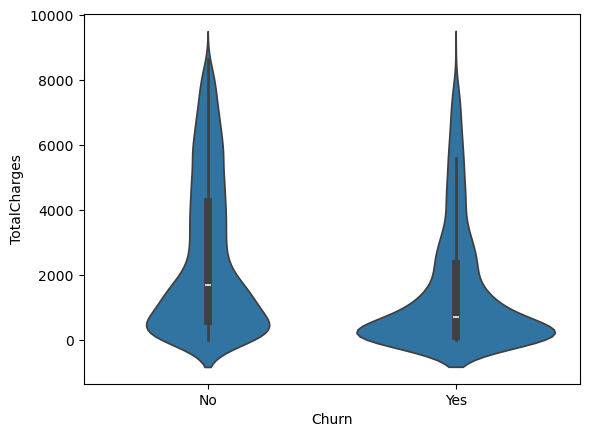

In [8]:

sns.violinplot(data = df,x = 'Churn',y = 'TotalCharges')

<Axes: xlabel='Contract', ylabel='TotalCharges'>

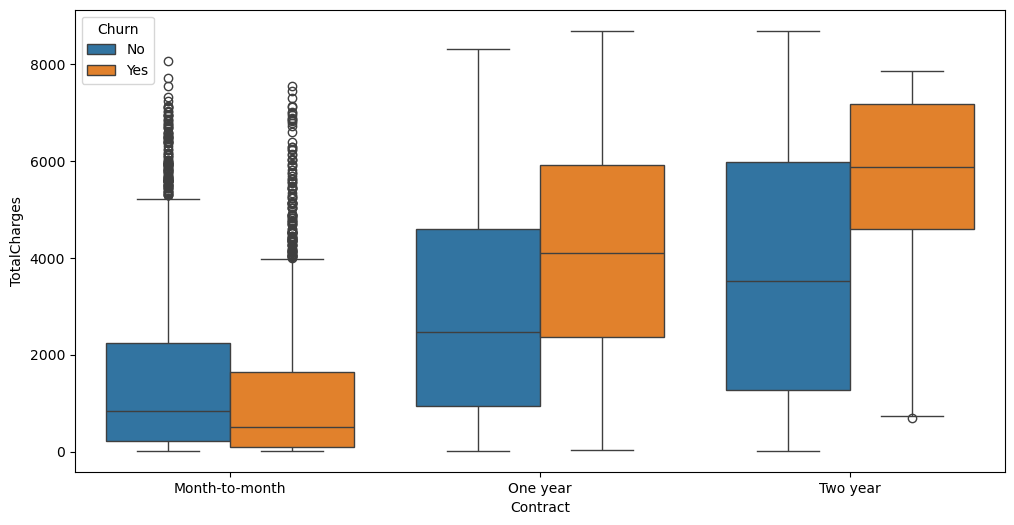

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(data = df,y = 'TotalCharges',x = 'Contract',hue = 'Churn')


<img src='fig3.png' >

In [10]:
#Checking for some special features
feat = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']]

In [11]:
feat2 = pd.get_dummies(feat,drop_first= True)

In [12]:
feat_corr =feat2.corr()

In [13]:
kk = feat_corr['Churn_Yes'].sort_values()
#kk = pd.DataFrame(data = kk,index=feat_corr.columns)
kk

Contract_Two year                       -0.301552
StreamingMovies_No internet service     -0.227578
StreamingTV_No internet service         -0.227578
InternetService_No                      -0.227578
OnlineBackup_No internet service        -0.227578
OnlineSecurity_No internet service      -0.227578
TechSupport_No internet service         -0.227578
DeviceProtection_No internet service    -0.227578
Contract_One year                       -0.178225
OnlineSecurity_Yes                      -0.171270
TechSupport_Yes                         -0.164716
Dependents_Yes                          -0.163128
Partner_Yes                             -0.149982
PaymentMethod_Credit card (automatic)   -0.134687
PaymentMethod_Mailed check              -0.090773
OnlineBackup_Yes                        -0.082307
DeviceProtection_Yes                    -0.066193
MultipleLines_No phone service          -0.011691
gender_Male                             -0.008545
PhoneService_Yes                         0.011691


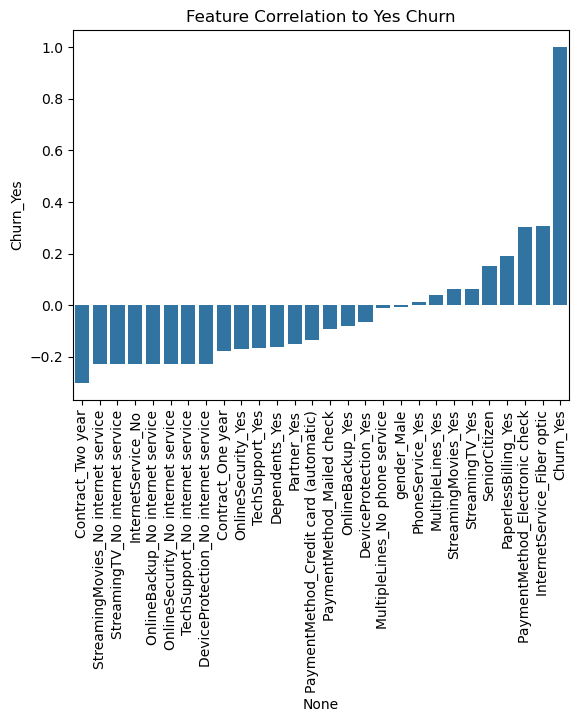

In [14]:
sns.barplot(y=feat_corr['Churn_Yes'].sort_values(),x= feat_corr['Churn_Yes'].sort_values().index)
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);


# Part 3: Churn Analysis

In [15]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<Axes: xlabel='tenure', ylabel='Count'>

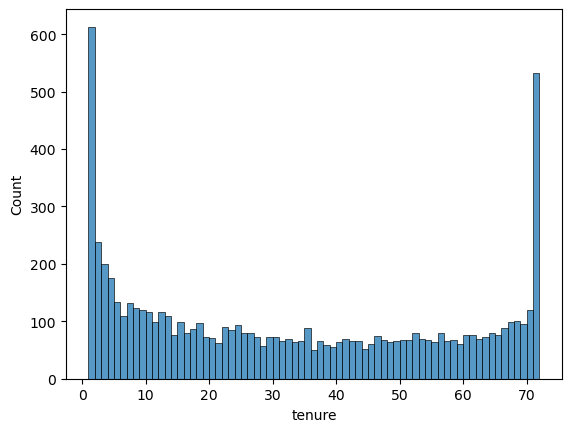

In [16]:

sns.histplot(data = df,x = 'tenure',binwidth=1)

<Figure size 2000x600 with 0 Axes>

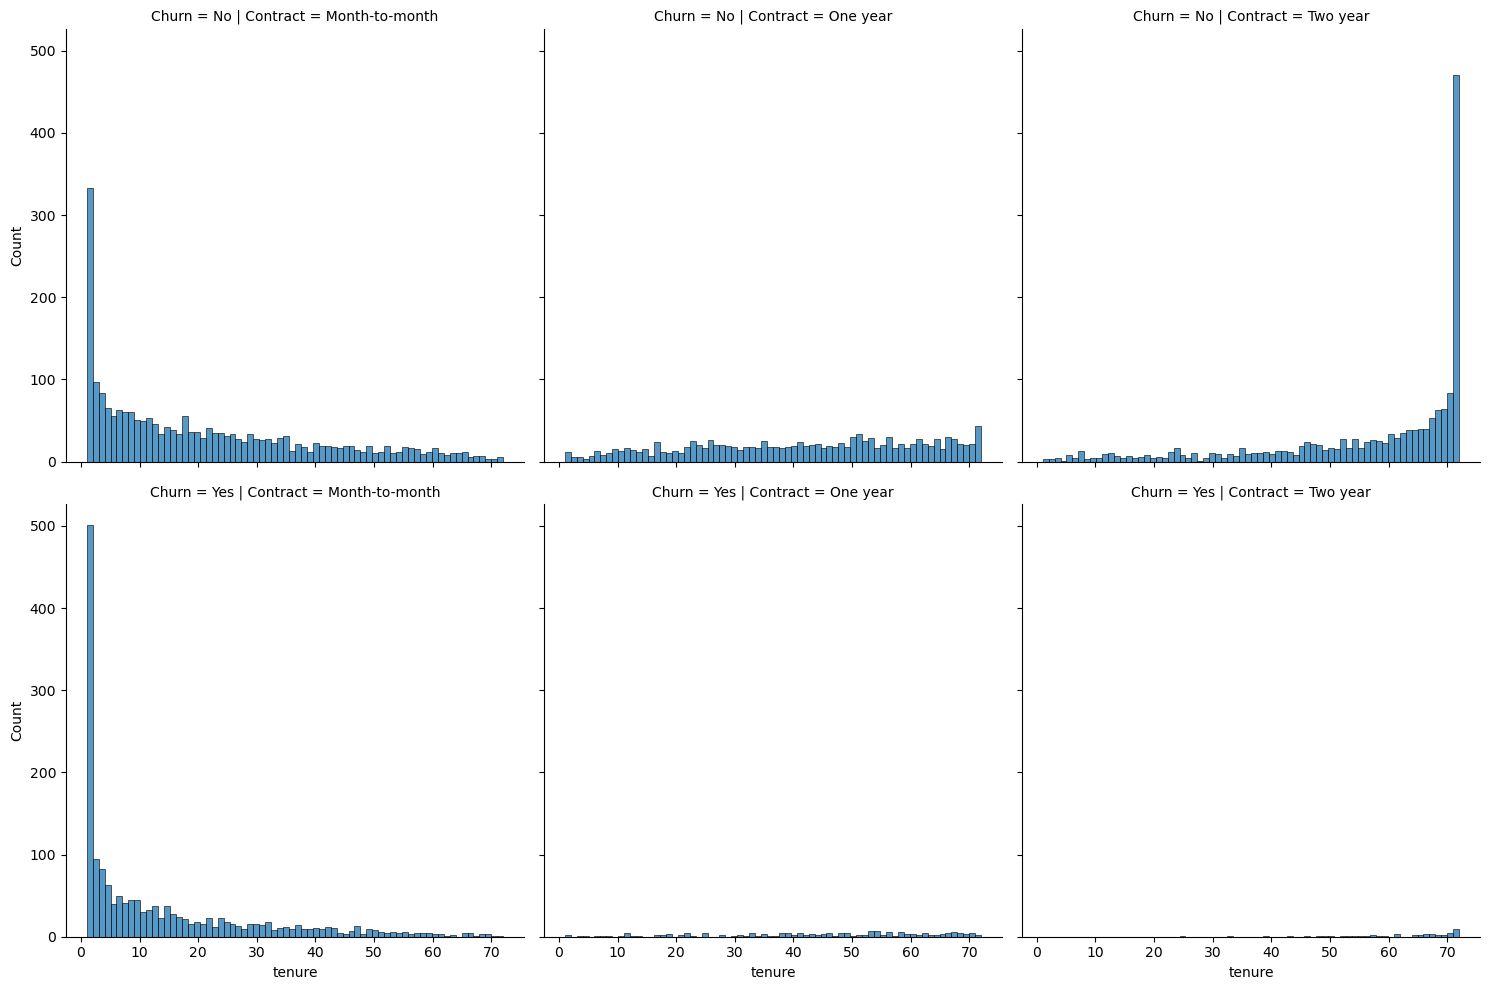

In [17]:
plt.figure(figsize=(10,3),dpi=200)
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn');

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

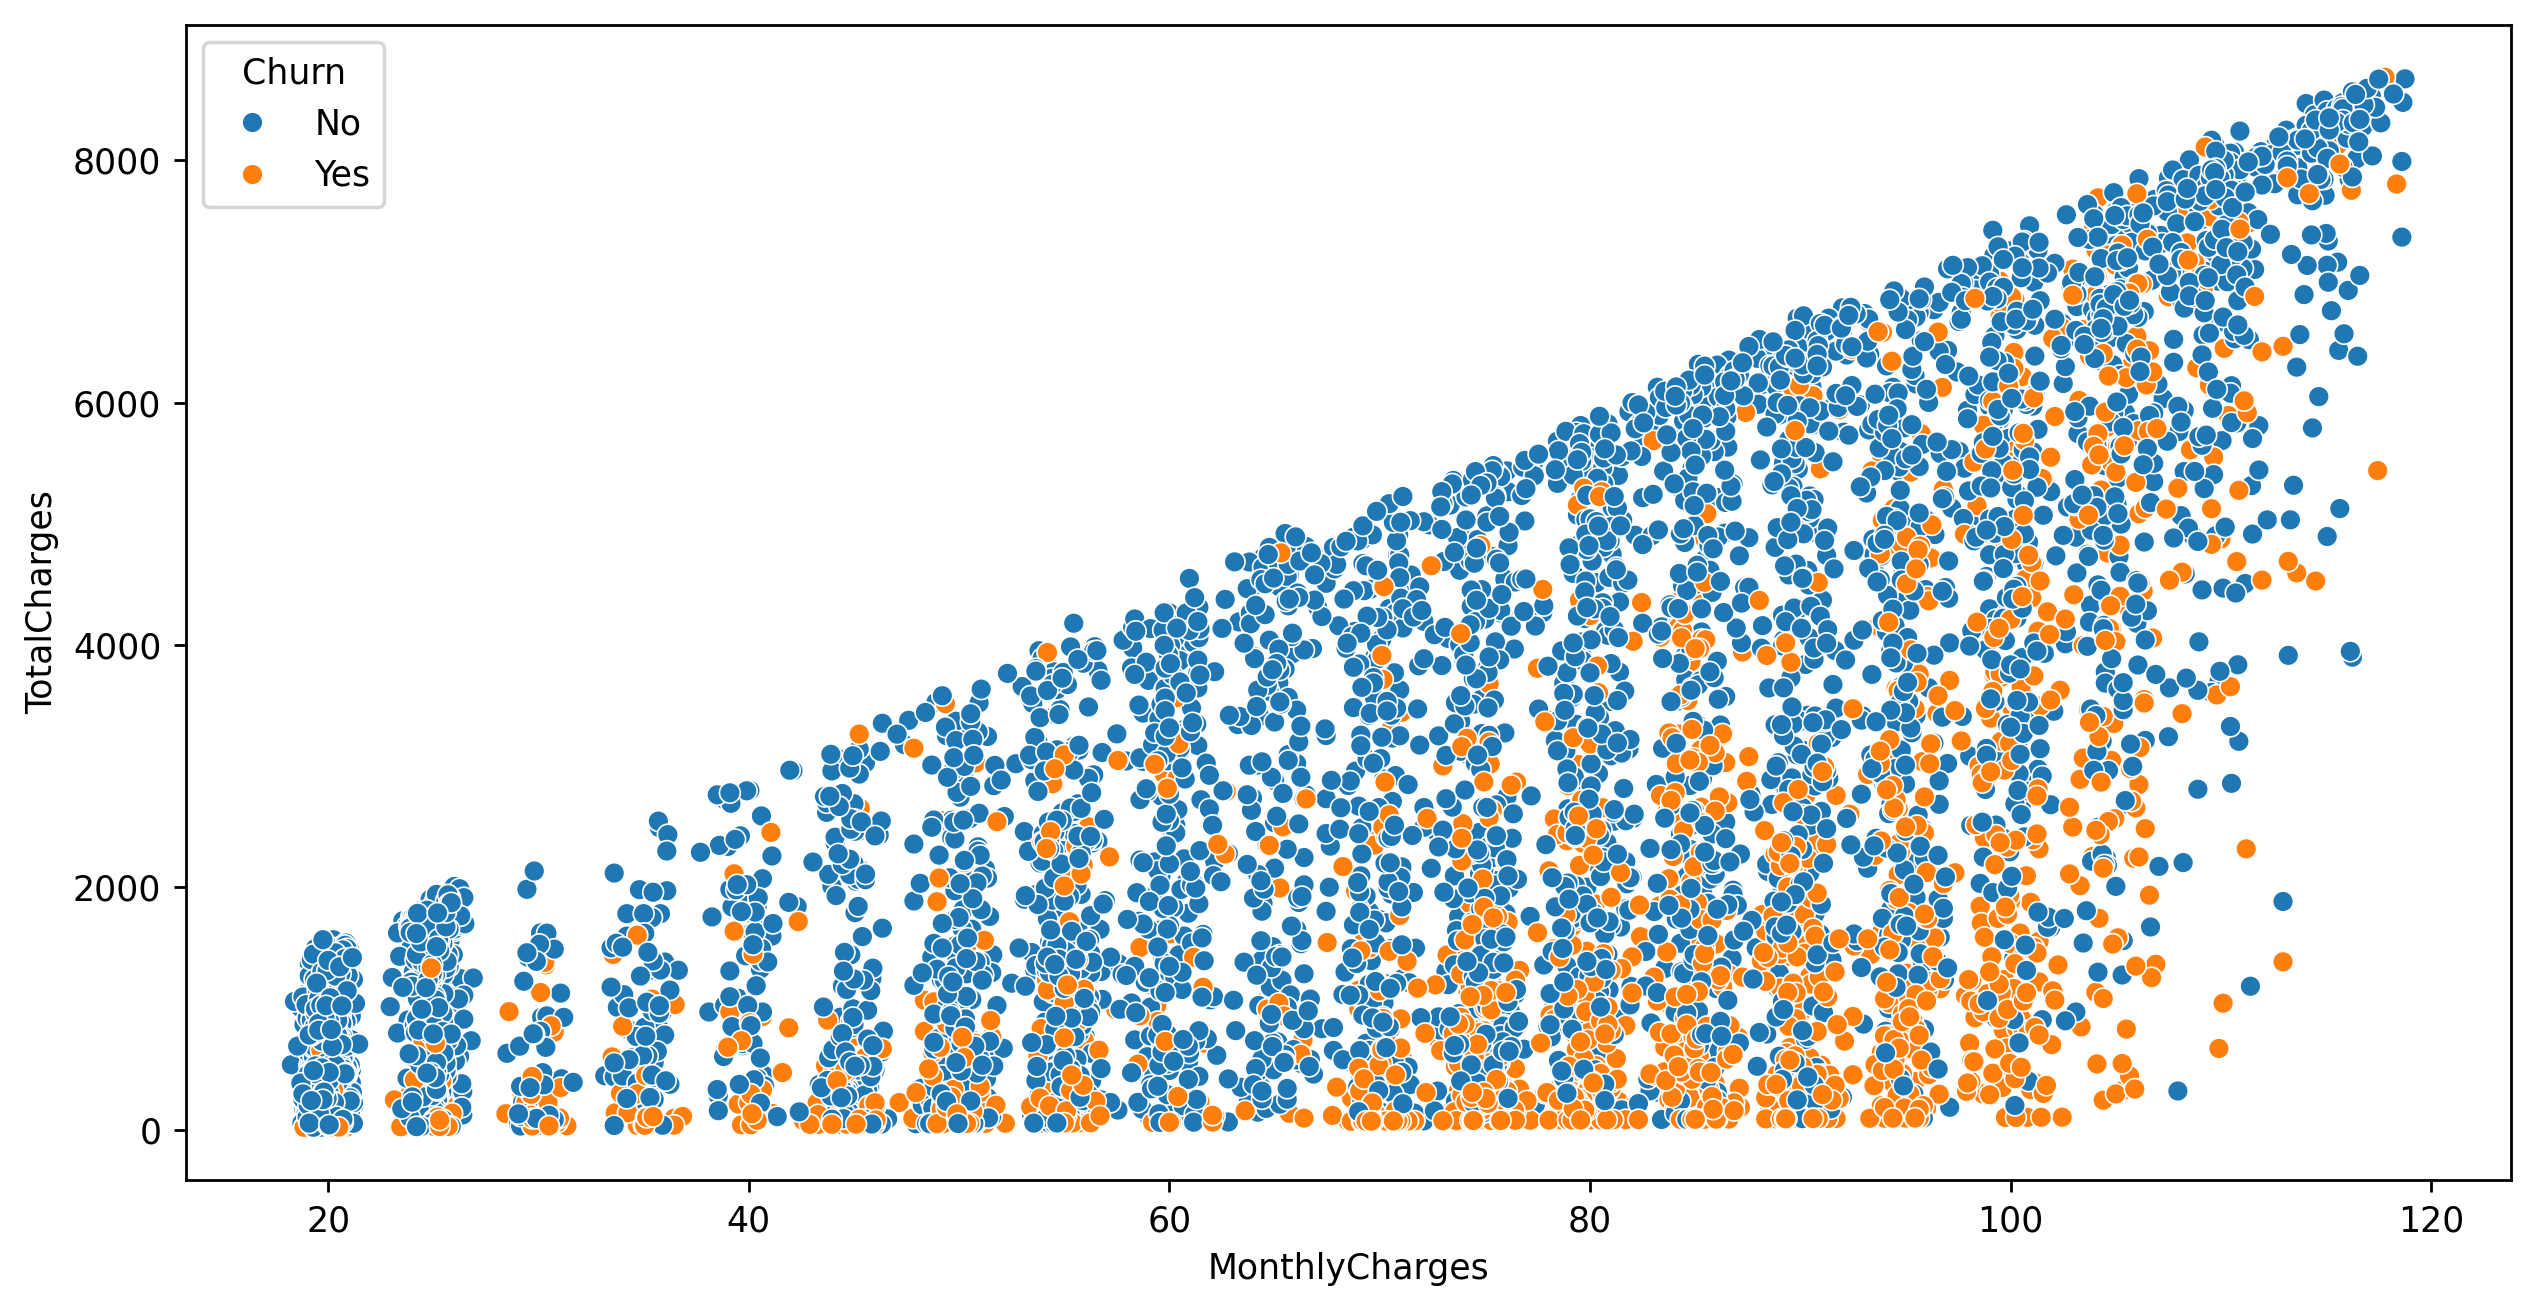

In [18]:
#sp of totalcharge vs monthly charge with churn
plt.figure(figsize=(12,6),dpi = 250)
sns.scatterplot(data = df,x = 'MonthlyCharges',y = 'TotalCharges',hue = 'Churn')

# Creating Cohorts based on Tenure

In [19]:

no_churn =df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn =df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [20]:
churn_rate = 100*(yes_churn/(yes_churn+no_churn))
churn_rate_cust = churn_rate.transpose()['customerID']

In [21]:
churn_rate_cust

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

#plot showing churn rate per months of tenure

<Axes: xlabel='tenure', ylabel='customerID'>

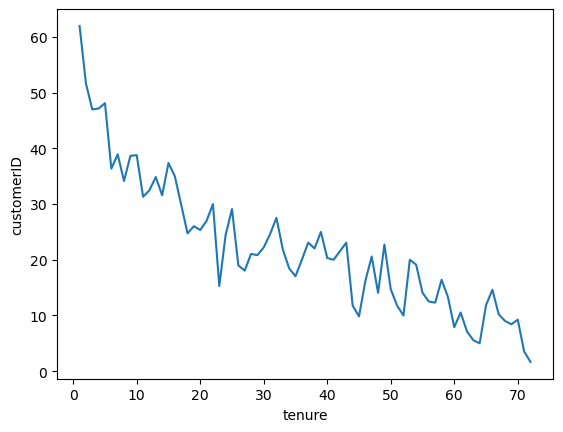

In [22]:
sns.lineplot(data= churn_rate_cust)

### Broader Cohort Groups
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [23]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"

In [24]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [25]:
df['Tenure Cohort']
df.head(10)[['tenure','Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


# a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

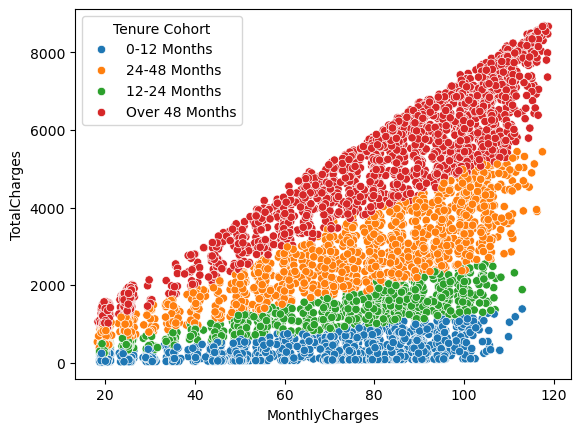

In [26]:

sns.scatterplot(data = df,y='TotalCharges',x='MonthlyCharges',hue = 'Tenure Cohort')

<Axes: xlabel='Tenure Cohort', ylabel='count'>

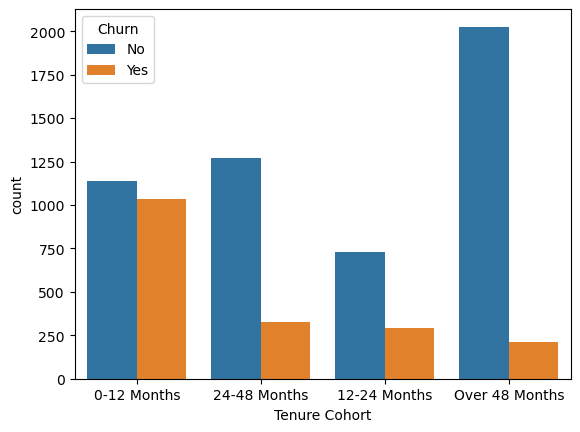

In [27]:
# a count plot showing the churn count per cohort
sns.countplot(data = df,x= 'Tenure Cohort',hue = 'Churn')

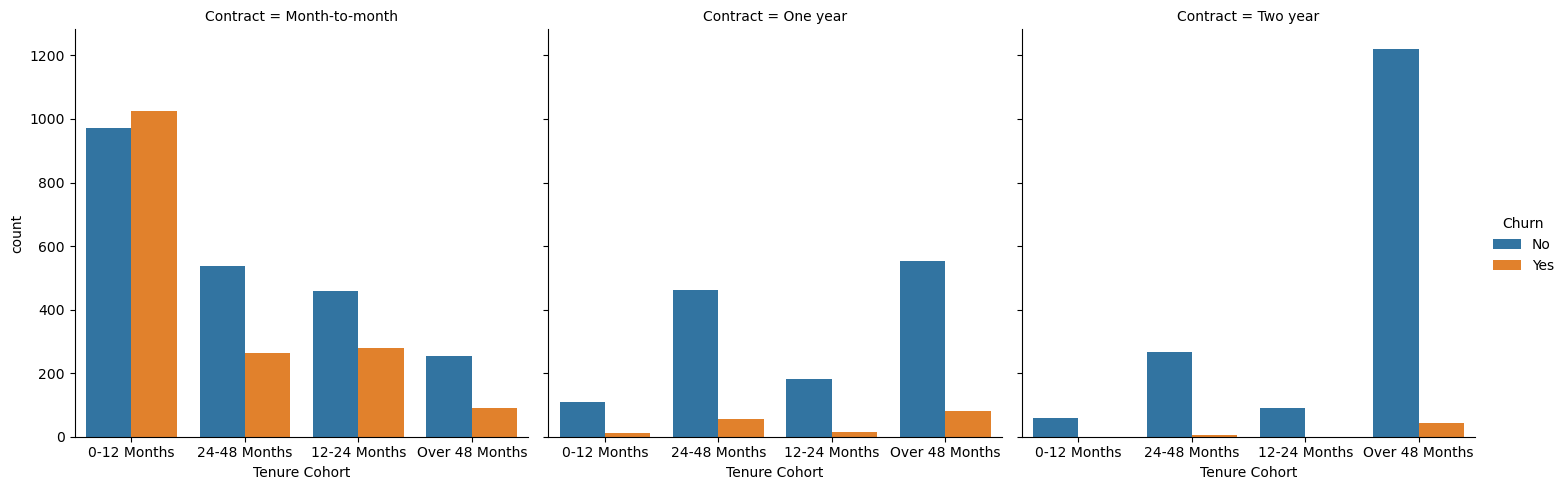

In [28]:

sns.catplot(data = df,x= 'Tenure Cohort',col='Contract',hue = 'Churn',kind= 'count')


-----

# Part 4: Predictive Modeling

**exploring 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting.**

In [29]:

X=df.drop('Churn',axis = 1)
y = df['Churn']
X= pd.get_dummies(X,drop_first=True)

In [30]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure Cohort_12-24 Months,Tenure Cohort_24-48 Months,Tenure Cohort_Over 48 Months
0,0,1,29.85,29.85,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
1,0,34,56.95,1889.50,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
2,0,2,53.85,108.15,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
3,0,45,42.30,1840.75,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,0,2,70.70,151.65,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,False,False,False,False,False,False,...,True,True,False,True,False,False,True,True,False,False
7028,0,72,103.20,7362.90,False,False,False,False,False,False,...,True,True,False,True,True,False,False,False,False,True
7029,0,11,29.60,346.45,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
7030,1,4,74.40,306.60,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False


In [31]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7027     No
7028     No
7029     No
7030    Yes
7031     No
Name: Churn, Length: 7032, dtype: object

# train test split, holding out 10% of the data for testing

In [32]:

from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [34]:
#decision tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV



In [36]:
dct = DecisionTreeClassifier()
param_grid = {'max_depth':[1,5,6]}
grid = GridSearchCV(dct,param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 5, 6]})

In [37]:
grid.best_params_
from sklearn.tree import plot_tree
dct_best = DecisionTreeClassifier(max_depth=5)
dct_best.fit(X_train,y_train)
y_dct = dct_best.predict(X_test)

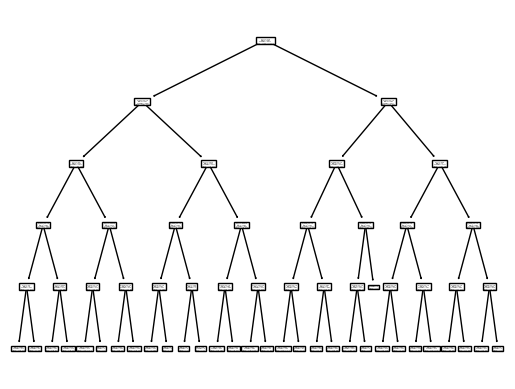

In [38]:
plot_tree(dct_best);

In [39]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

              precision    recall  f1-score   support

          No       0.86      0.89      0.88       557
         Yes       0.52      0.44      0.47       147

    accuracy                           0.80       704
   macro avg       0.69      0.66      0.67       704
weighted avg       0.79      0.80      0.79       704



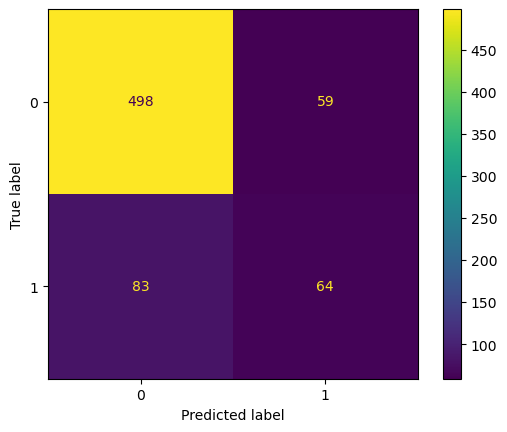

In [40]:
print(classification_report(y_test,y_dct))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,y_dct))
disp.plot()

In [41]:
# random forest

In [42]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

C:\Users\Alessandro\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Alessandro\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alessandro\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Alessandro\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Alessandro\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Alessandro\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.a

C:\Users\Alessandro\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Alessandro\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alessandro\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Alessandro\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Alessandro\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Alessandro\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.a

              precision    recall  f1-score   support

          No       0.87      0.92      0.89       557
         Yes       0.60      0.46      0.52       147

    accuracy                           0.82       704
   macro avg       0.73      0.69      0.71       704
weighted avg       0.81      0.82      0.81       704



In [43]:
rfm = RandomForestClassifier()
rfm.fit(X_train,y_train)
y_rfm = rfm.predict(X_test)

              precision    recall  f1-score   support

          No       0.87      0.92      0.89       557
         Yes       0.59      0.46      0.52       147

    accuracy                           0.82       704
   macro avg       0.73      0.69      0.70       704
weighted avg       0.81      0.82      0.81       704



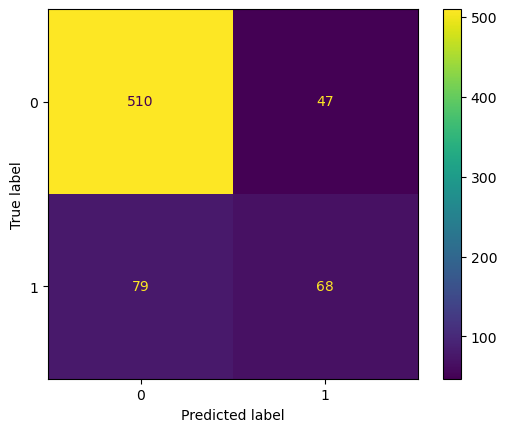

In [44]:
print(classification_report(y_test,y_rfm))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,y_rfm))
disp.plot()

In [45]:
# Boosted trees

In [46]:

from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()
gbc.fit(X_train,y_train)
y_gbc = gbc.predict(X_test)
abc.fit(X_train,y_train)
y_abc = abc.predict(X_test)

C:\Users\entro\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

          No       0.87      0.91      0.89       557
         Yes       0.60      0.50      0.54       147

    accuracy                           0.83       704
   macro avg       0.74      0.71      0.72       704
weighted avg       0.82      0.83      0.82       704



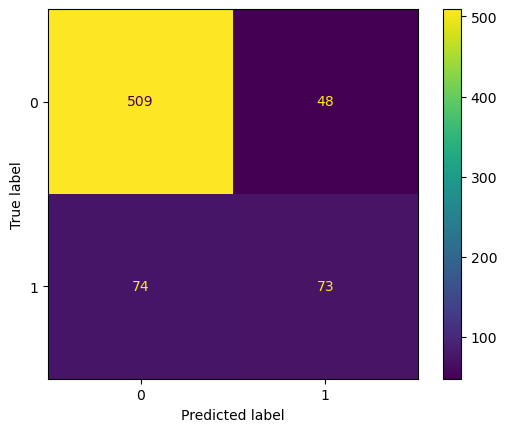

In [47]:
print(classification_report(y_test,y_gbc))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,y_gbc))
disp.plot()

              precision    recall  f1-score   support

          No       0.88      0.91      0.89       557
         Yes       0.60      0.51      0.55       147

    accuracy                           0.83       704
   macro avg       0.74      0.71      0.72       704
weighted avg       0.82      0.83      0.82       704



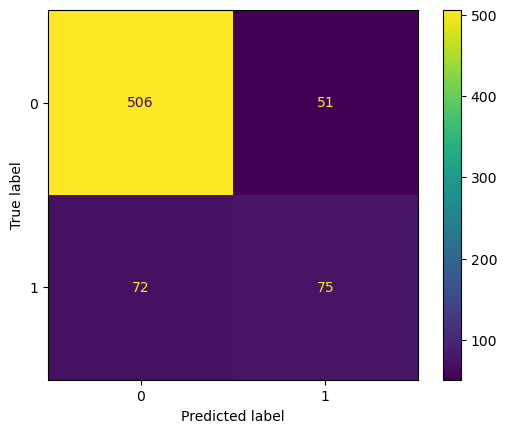

In [48]:
print(classification_report(y_test,y_abc))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,y_abc))
disp.plot()

In [49]:
# With base models, we got best performance from an AdaBoostClassifier we didn't do any gridsearching AND most models performed about the same on the data set.

In [50]:
from joblib import dump,load

In [51]:
final_model = abc.fit(X,y)

C:\Users\entro\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [52]:
dump(final_model,'churn.joblib')

['churn.joblib']